# Working with audio data and Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import librosa
import librosa.display

# Importing other libraries just in case

import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
file_path = "/Desktop/CU_Boulder/SEM_2/Machine_Learning/Data"
print(os.listdir(f'{file_path}/genres_original/'))  # This will show us the 10 genre in the file.

['metal', 'reggae', 'pop', 'rock', 'blues', 'hiphop', 'classical', 'country', 'disco', 'jazz']


In [4]:
sound, sample_rate = librosa.load(f'{file_path}/genres_original/classical/classical.00003.wav')

In [5]:
print('Vibration sequence:', sound)  # Audio time series
array_len = sound.shape
print('\nSound shape:', array_len)
print('Sample Rate (Hz):', sample_rate)

# Length of the sound
print('Check Len of Audio:', array_len[0] / sample_rate)

Vibration sequence: [-0.0083313  -0.02258301 -0.04367065 ...  0.00463867 -0.00314331
 -0.00640869]

Sound shape: (661794,)
Sample Rate (Hz): 22050
Check Len of Audio: 30.013333333333332


All the sounds in this dataset are hard cut instead of fade in and fade out hence, there are clicks in the beginning and end of the samples instead of silence or in more computer terms, there is information in the both ends. So, we do not need to trim them using librosa.effects.trim().

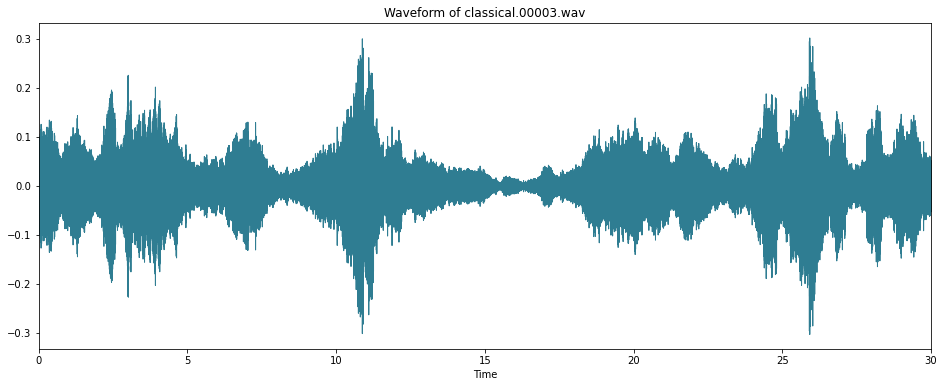

In [6]:
# Let's look at the waveform of the sound.

plt.figure(figsize=(16, 6))
librosa.display.waveplot(y=sound, sr=sample_rate, color="#2f7d92ff")
plt.title("Waveform of classical.00003.wav", fontsize=12)  # Classical music are highly dynamic.
plt.show()

## Fourier Transform

In mathematics, a Fourier transform (FT) is a mathematical transform that decomposes a function (often a function of time, or a signal) into its constituent frequencies, such as the expression of a musical chord in terms of the volumes and frequencies of its constituent notes. The term Fourier transform refers to both the frequency domain representation and the mathematical operation that associates the frequency domain representation to a function of time.

Refer : [wikipedia](http://**en.wikipedia.org/wiki/Fourier_transform).

In [9]:

# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(sound, n_fft=n_fft, hop_length=hop_length))

print('Shape of D object:', np.shape(D))
print('\nD:-\n', D)

Shape of D object: (1025, 1293)

D:-
 [[1.9609461e+00 7.0502210e-01 2.6253659e-01 ... 1.9574383e-02
  3.4849790e-01 1.9711530e+00]
 [1.5580634e+00 1.3740649e+00 6.5318769e-01 ... 4.1530213e-01
  4.7912714e-01 1.9222113e+00]
 [6.9530737e-01 7.8665549e-01 1.5844011e+00 ... 5.5874109e-01
  7.3164481e-01 1.2779436e+00]
 ...
 [6.5202378e-03 3.4063056e-03 1.7256488e-04 ... 5.8354395e-05
  2.1812212e-04 7.3153572e-04]
 [6.7317639e-03 3.2826629e-03 2.5772859e-04 ... 1.9073405e-04
  4.5078222e-04 6.1486248e-04]
 [6.7743198e-03 3.4950820e-03 3.1631842e-04 ... 5.0587044e-04
  5.4075033e-04 4.1508993e-05]]


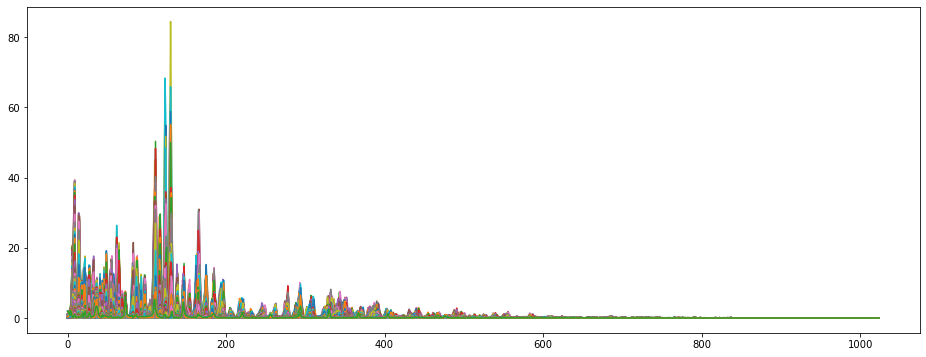

In [10]:
plt.figure(figsize = (16, 6))
plt.plot(D)
plt.show()

### Time to look at the spectrogram

**What is a spectrogram?**

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams.

refer  [wikipedia](http://en.wikipedia.org/wiki/Spectrogram).

    In musical term, a spectrogram is a detailed view of audio, able to represent time, frequency, and amplitude all on one graph. A spectrogram can visually reveal broadband, electrical, or intermittent noise in audio.

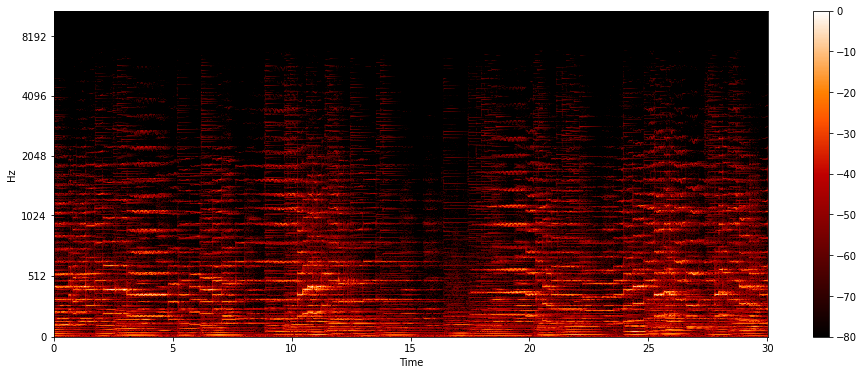

In [11]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
db = librosa.amplitude_to_db(D, ref=np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(db, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel',
                        cmap='gist_heat')
plt.colorbar();
# We are using 'gist_heat' colour map because this colour is similar to Izotope Rx Spectogram
# And it is mostly common in the world of music.

In [12]:
zc = librosa.zero_crossings(sound, pad=False)  # The zero crossing rate of the sound sample
sum(zc)

72206

In [13]:
zc2 = librosa.zero_crossings(my_sample, pad=False)  # The zero crossing rate of my song
sum(zc2)

636442

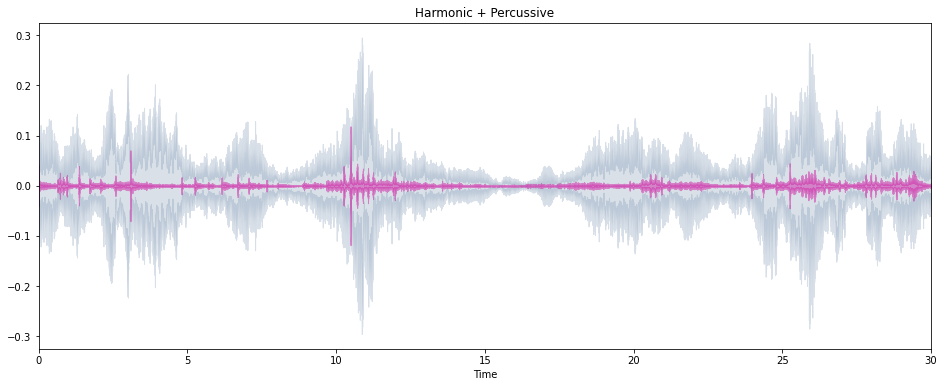

In [14]:
# Decompose an audio time series into harmonic and percussive components.

y_harm, y_perc = librosa.effects.hpss(sound)
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y_harm, sr=sample_rate, color="#6885a7ff", alpha=0.25);
librosa.display.waveplot(y_perc, sr=sample_rate, color='#cf27a7ff', alpha=0.5);
ax = plt.axes()
ax.set(title='Harmonic + Percussive');

In [15]:
# Detecting the tempo of the track

tempo = librosa.beat.tempo(y=sound, sr=sample_rate)
print(tempo)

[135.99917763]


In [16]:
tempo = librosa.beat.tempo(y=my_sample, sr=my_sample_rate)
print(tempo)  # This value is wrong. This is not the tempo of my song.

[99.38401442]


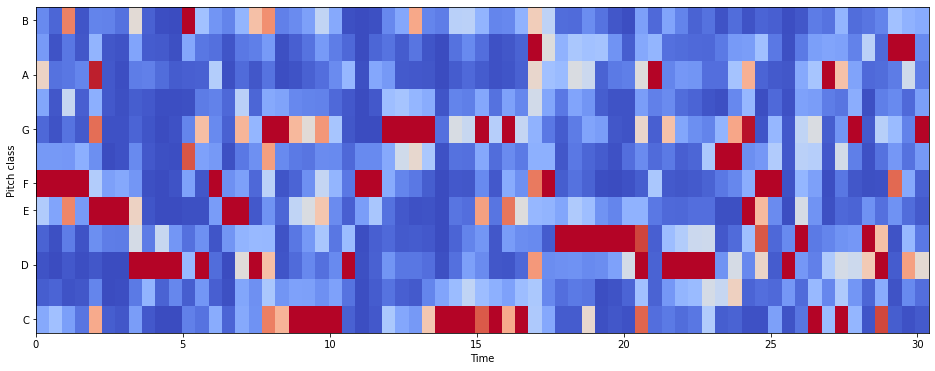

In [17]:
# Chromogram
chromagram = librosa.feature.chroma_stft(sound, sr=sample_rate, hop_length=10000)
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=10000, cmap='coolwarm');

# Low hop_legth = finer cell blocks.

In [18]:
# Importing 30 secs csv file.
pd.set_option('max_columns', None)
data = pd.read_csv(f'{file_path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


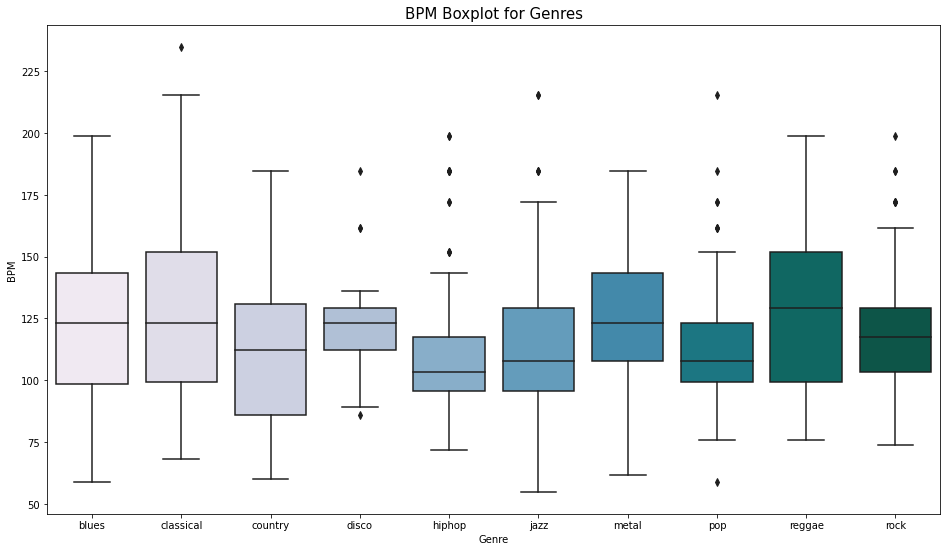

In [19]:


x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'PuBuGn');

plt.title('BPM Boxplot for Genres', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 10)
plt.ylabel("BPM", fontsize = 10)
plt.savefig("BPM Boxplot.jpg")

In [20]:
point = data.iloc[:, 2:]
point

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.352063,0.080487,0.079486,0.000345,20

In [21]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.drop('label', axis=1)

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

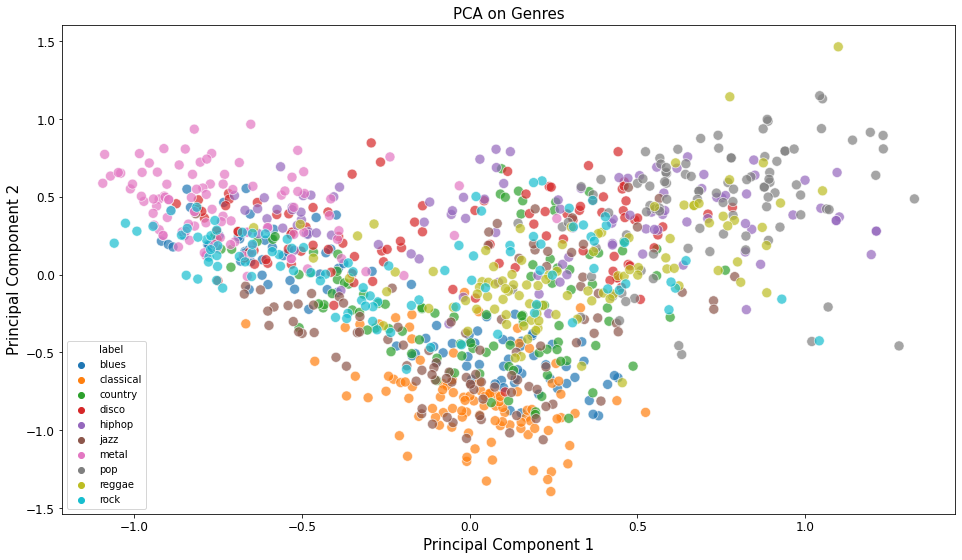

In [22]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")